In [4]:
import tensorflow as tf

'''
basic
'''

# tf.constant
hello = tf.constant('hello!!')


a = tf.constant(10)
b = tf.constant(20)
c = a + b
print(c)



# run
sess = tf.Session()

print(sess.run(hello))
print(sess.run([a, b, c]))

sess.close()

Tensor("add_2:0", shape=(), dtype=int32)
b'hello!!'
[10, 20, 30]


In [13]:
'''
variable
'''

# place holder
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# data
x_data = [ [1, 2, 3], [100, 200, 300], [0.1, 0.2, 0.3] ]

# W, b : variables
# random_normal : pick randomly by normal distribution
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))

# matmul
expr = tf.matmul(X, W) + b

sess = tf.Session()

# initialize
sess.run(tf.global_variables_initializer())


print('=== x_data === ')
print(x_data)
print('=== W ===')
print(sess.run(W))
print('=== b ===')
print(sess.run(b))
print('=== expr ===')
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

Tensor("Placeholder_8:0", shape=(?, 3), dtype=float32)
=== x_data === 
[[1, 2, 3], [100, 200, 300], [0.1, 0.2, 0.3]]
=== W ===
[[-1.2249169  -0.98532057]
 [-1.8640672  -1.2284504 ]
 [ 0.20530269 -1.4556185 ]]
=== b ===
[[0.4260347 1.2184966]]
=== expr ===
[[-3.9111087e+00 -6.5905809e+00]
 [-4.3328833e+02 -7.7968921e+02]
 [-7.6796114e-03  4.3758881e-01]]


In [17]:
'''
Linear Regression
'''

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# random_uniform : shape, range
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# name : for graph, tensorboard
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")


# relationship
# y = W * x + b
hypothesis = W * X + b


# loss function
# mean(h - Y)^2
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# aim : minimize
train_op = optimizer.minimize(cost)


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    # loop : 100
    for step in range(100) :
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        
        print(step, cost_val, sess.run(W), sess.run(b))
        
    
    # finish optimize
    print("\n==== Test ====")
    print("X: 5, Y: ", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y: ", sess.run(hypothesis, feed_dict={X: 2.5}))

0 7.5832686 [0.96007] [0.40774602]
1 0.108572185 [0.8342396] [0.3421688]
2 0.018431041 [0.8520818] [0.3400392]
3 0.016540421 [0.85412306] [0.33119863]
4 0.01574261 [0.8577954] [0.3233097]
5 0.014994691 [0.8611958] [0.31552958]
6 0.01428242 [0.86453456] [0.30794534]
7 0.013604 [0.8677909] [0.30054247]
8 0.012957799 [0.8709691] [0.29331765]
9 0.012342289 [0.8740709] [0.28626648]
10 0.011756015 [0.8770981] [0.27938482]
11 0.011197605 [0.8800526] [0.27266863]
12 0.010665712 [0.88293606] [0.26611385]
13 0.010159079 [0.8857502] [0.25971666]
14 0.009676517 [0.8884967] [0.25347325]
15 0.009216865 [0.8911771] [0.24737993]
16 0.008779068 [0.89379317] [0.2414331]
17 0.008362046 [0.8963463] [0.23562922]
18 0.007964853 [0.89883804] [0.22996485]
19 0.007586519 [0.90127] [0.22443669]
20 0.0072261444 [0.9036433] [0.21904135]
21 0.006882913 [0.90595967] [0.21377574]
22 0.006555958 [0.90822035] [0.20863673]
23 0.006244539 [0.9104267] [0.20362125]
24 0.005947925 [0.91257995] [0.19872634]
25 0.0056653954 

In [23]:
'''
Neural Network Basic
'''
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [기타, 포유류, 조류]
# one-hot vector
y_data = np.array([
    [1, 0, 0], # 기타
    [0, 1, 0], # 포유류
    [0, 0, 1], # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
    
])


# Neural Net model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# dimension : 2 -> 3
# weight
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.))

# bias
b = tf.Variable(tf.zeros([3]))

# layer
L = tf.add(tf.matmul(X, W), b)
# ReLU
L = tf.nn.relu(L)

# softmax
model = tf.nn.softmax(L)

# cost : cross-Entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))
#        Y         model         Y * tf.log(model)   reduce_sum(axis=1)
# 예) [[1 0 0]  [[0.1 0.7 0.2]  -> [[-1.0  0    0]  -> [-1.0, -0.09]
#     [0 1 0]]  [0.2 0.8 0.0]]     [ 0   -0.09 0]]

# optimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)



##################
# train NN Model #
##################
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# loop : 100
for step in range(1000) :
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    if( step + 1 ) % 10 == 0 :
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        
        
        
##########
# Result #
##########
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)

print('예측: ', sess.run(prediction, feed_dict={X: x_data}))
print('실제: ', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

    

10 1.2339853
20 1.2211602
30 1.2088679
40 1.1972097
50 1.1860236
60 1.1753429
70 1.1651369
80 1.155331
90 1.1459912
100 1.1370515
110 1.1284732
120 1.1226599
130 1.1171323
140 1.1118276
150 1.1066139
160 1.101592
170 1.0966897
180 1.0919509
190 1.0873079
200 1.0828471
210 1.0784187
220 1.074177
230 1.0700277
240 1.0661153
250 1.0627388
260 1.0594604
270 1.05628
280 1.0531923
290 1.0501779
300 1.047233
310 1.0443382
320 1.038499
330 1.032879
340 1.0273756
350 1.021995
360 1.0167063
370 1.0118868
380 1.0075908
390 1.0033249
400 0.99902374
410 0.9949059
420 0.9908151
430 0.98684096
440 0.98278123
450 0.9789272
460 0.9753657
470 0.97181016
480 0.96835136
490 0.964945
500 0.96150875
510 0.95820516
520 0.9549213
530 0.9516349
540 0.94843894
550 0.94518155
560 0.94205517
570 0.938996
580 0.9358165
590 0.9328728
600 0.9297735
610 0.9268791
620 0.92385656
630 0.92103463
640 0.91811985
650 0.91526145
660 0.912478
670 0.9097478
680 0.9069602
690 0.9042688
700 0.90153044
710 0.8989382
720 0.896265

loss at step  10 :  4.30923
loss at step  20 :  3.8496513
loss at step  30 :  3.779565
loss at step  40 :  3.2267723
loss at step  50 :  3.4403617
loss at step  60 :  3.3112445
loss at step  70 :  3.403108
loss at step  80 :  3.4824646
loss at step  90 :  3.5410752
loss at step  100 :  3.2437694
loss at step  110 :  3.227857
loss at step  120 :  3.4104767
loss at step  130 :  3.1797168
loss at step  140 :  3.092521
loss at step  150 :  3.1075792
loss at step  160 :  3.108034
loss at step  170 :  3.229899
loss at step  180 :  3.4281242
loss at step  190 :  3.05057
loss at step  200 :  3.2511191
loss at step  210 :  2.9003756
loss at step  220 :  2.91719
loss at step  230 :  3.1655345
loss at step  240 :  2.9869711
loss at step  250 :  2.896656
loss at step  260 :  3.3399773
loss at step  270 :  3.2619166
loss at step  280 :  3.091504
loss at step  290 :  3.2186043
loss at step  300 :  3.2962036


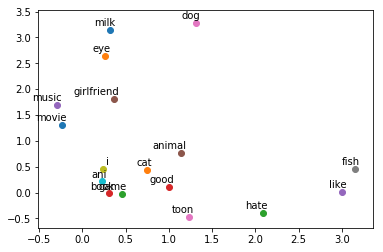

In [3]:
'''
Word2Vec
'''

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sentences = ["i like cat",
             "i like dog",
             "i like animal",
             "dog cat animal",
             "girlfriend cat dog like",
             "cat fish milk like",
             "dog fish hate milk like",
             "dog cat eye good",
             "i girlfriend good",
             "girlfriend i hate",
             "girlfriend i movie book music good",
             "i game toon ani good",
             "cat dog hate",
             "dog cat like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

word_dict = {w: i for i, w in enumerate(word_list)}

# window-size : 1, skip-gram model
skip_grams = []

for i in range(1, len(word_sequence) - 1) :
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    
    # (target, context[0]), (target, context[1])...
    for w in context :
        skip_grams.append([target, w])
    
# pick batch data randomly
def random_batch(data, size) :
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(data[i][0]) # target
        random_labels.append([data[i][1]]) # context_word
        
    return random_inputs, random_labels

#####
# option
#####

training_epoch = 300
learning_rate = 0.1

batch_size = 20
embedding_size = 2
        
# nce_loss < sampling size
num_sampled = 15
voc_size = len(word_list)


######
# nn model
######

inputs = tf.placeholder(tf.int32, shape=[batch_size])
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))

# 예) embeddings     inputs    selected
#    [[1, 2, 3]  -> [2, 3] -> [[2, 3, 4]
#     [2, 3, 4]                [3, 4, 5]]
#     [3, 4, 5]
#     [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

# variables for nce_loss function
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# nce_loss
loss = tf.reduce_mean(
        tf.nn.nce_loss(nce_weights, nce_biases, labels, 
                           selected_embed, num_sampled, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)


###
# model training
###
with tf.Session() as sess :
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for step in range(1, training_epoch + 1) :
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        
        _, loss_val = sess.run([train_op, loss],
                                  feed_dict={inputs: batch_inputs,
                                             labels: batch_labels})
        
        if step % 10 == 0 :
            print("loss at step ", step, ": ", loss_val)
            
        trained_embeddings = embeddings.eval()
        
    

###
# show results
###
    
for i, label in enumerate(word_list) :
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom')
    
plt.show()


In [ ]:
'''
[ Saver ]
load and save model
'''

sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else :
    sess.run(tf.global_variables_initializer())
    
# optimize
...

# after optimize
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

'''
[ TensorBoard ]
'''
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./logs', sess.graph)

for step in range(100) :
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    summary = sess.run(merged, feed_dict={X: x_data, Y: y_data})
    writer.add_summary(summary, global_step=sess.run(global_step))
    
    
